# Perkenalan


## **Mailstone**


Nama : Muhammad Afif Alvan

Batch : Batch-016-rmt


#Identifikasi Masalah

##Topik Permasalahan
---
Data yang diperoleh merupakan dataset yang berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Dataset ini bertujuan untuk memprediksi berdasarkan pengukuran diagnostik apakah pasien menderita diabetes. Secara khusus data ini berisi semua pasien perempuan yang berusia 21 tahun dari keturunan Pima India. 
Diabetes adalah penyakit yang sudah tidak asing lagi dan penyebarannya yang luas, untuk mengatasinya kita butuh pengukuran untuk mengetahui resiko-resiko terkena penyakit diabetes.

##Problem Statement
---
Apakah pasien perempuan yang mengidap penyakit diabetes dapat diukur menggunakan pengukuran diagnostik dilihat dari tanda dan gejalanya.

##Rumusan Masalah
---
* Bagaimana perbandingan antara pasien dengan diabetes dan tidak dengan diabetes
* Pada rentang umur berapa yang memiliki diabetes paling tinggi dan disertai glucosa yang tinggi
* Bagaimana korelasi antara glucosa dengan insulin
* Bagaimana hubungan antara glucosa dengan insulin ditinjau dari penyebarannya

# DATA LOADING

sumber data dari kaggle : https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [423]:
#Melakukan Importing data dengan pandas
import pandas as pd
import numpy as np
#import library perhitungan
from scipy import stats
import numpy as np
#Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
#Mengambil data dari file lokal dengan pandas
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [425]:
#Mencari informasi terkait data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Data Cleaning
---
Data cleaning dilakukan untuk membersihkan data dari nilai error dan outlier.

In [426]:
#Mengecek data missing value
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [427]:
#Melihat sekilas tentang data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


---
Secara sekolas terdapat banyak sekali nilai 0 pada dataset. Ini mengindikasi bahwa nilai 0 tersebut seblumnya adalah missing value yang dirubah dengan 0. Sehingga akan saya berikan handling pada nilai 0.

In [428]:
#Menghitung nilai jumlah 0 dalam persen
data_ = ['Glucose','Insulin']

for v in data_:
  print(f'Rata-rata jumlah nilai 0 pada',v ,':', (df[v] == 0).sum() / df[v].sum() * 100 , '%')

Rata-rata jumlah nilai 0 pada Glucose : 0.005385203614548666 %
Rata-rata jumlah nilai 0 pada Insulin : 0.610253565251444 %


* Jika Nilai 0 bertotal di bawah 5 % maka di hapus
* Jika Nilai 0 bertotal di atas 5 % maka di lakukan penggantian nilai

Semua nilai 0 pada data berada dibawa 5 % maka data dapat dihapus

In [429]:
#Menhapus nilai 0
for d in data_:
  db = df.drop(df[df[d] == 0].index)


In [430]:
#Pengecekan nilai 0
for v in data_:
  print(f'Rata-rata jumlah nilai 0 pada',v ,':', (db[v] == 0).sum() / db[v].sum() * 100 , '%')

Rata-rata jumlah nilai 0 pada Glucose : 0.0020752054453390886 %
Rata-rata jumlah nilai 0 pada Insulin : 0.0 %


---
Nilai 0 sudah berhasil di handling, sehingga dapat dilanjutkan untuk proses cleaning selanjutnya.

## Statistik Deskriptif

### Outlier

In [431]:
#Menghitung nilai skewness dan central tendency
for xx in data_:
  print(f'Nilai Skewness', xx,':', db[xx].kurtosis())
  print(f'Nilai Mean', xx, ':', db[xx].mean())
  print(f'Nilai Median', xx, ':', db[xx].median())
  print(f'Nilai Modus', xx, ':', db[xx].mode()[0])
  print('\n')

Nilai Skewness Glucose : -0.04849838768657477
Nilai Mean Glucose : 122.30456852791878
Nilai Median Glucose : 119.0
Nilai Modus Glucose : 100


Nilai Skewness Insulin : 6.3705218146330305
Nilai Mean Insulin : 155.5482233502538
Nilai Median Insulin : 125.0
Nilai Modus Insulin : 105




---
Dalam pemilihan metode untuk penanganan outlier dapat dilihat dari nilai skewness. Glucosa dan insulin adalah data dengan distribusi tidak normal dengan nilai skewness. Sehingga akan dilakukan handling dengan IQR.

### Penangan Outlier

---
* Pada Glucose menggunakan Q3 +- 1.5 * IQR
* Pada Insulin menggunakan Q3 +- 1.5 * IQR

In [432]:
#Mencari nilai quartile dan IQR

data = ['Glucose', 'Insulin']
for i in data:
  Q1 = np.quantile(db[i], .25)
  Q3 = np.quantile(db[i], .75) 
  IQR = Q3 - Q1
  print(f'Nilai Q1', i, ':', Q1)
  print(f'Nilai Q3', i, ':', Q3)
  print(f'Nilai IQR', i, ':', IQR)
  print('\n')
 

Nilai Q1 Glucose : 99.0
Nilai Q3 Glucose : 143.0
Nilai IQR Glucose : 44.0


Nilai Q1 Insulin : 76.25
Nilai Q3 Insulin : 190.0
Nilai IQR Insulin : 113.75




In [433]:
# Penangan Outlier  Glucose
Q1_g = np.quantile(db['Glucose'], .25)
Q3_g = np.quantile(db['Glucose'], .75) 
IQR_g = Q3 - Q1

BB_g = Q1 - 1.5 * IQR_g
BA_g = Q1 + 1.5 * IQR_g

# Penanganan Outlier di Insulin
Q1_i = np.quantile(db['Insulin'], .25)
Q3_i = np.quantile(db['Insulin'], .75) 
IQR_i = Q3 - Q1

BB_i = Q1 - 1.5 * IQR_i
BA_i = Q1 + 1.5 * IQR_i



In [434]:
#Memisahkan data yang tergolong outlier dengan IQR
a = db[(db['Glucose'] > BB_g) | (db['Glucose'] < BA_g)]
b = a[(a['BloodPressure'] > BB_bp) | (a['BloodPressure'] < BA_bp)]
c = b[(b['SkinThickness'] > BB_st) | (b['SkinThickness'] < BA_st)]
db = c[(c['Insulin'] > BB_i) | (c['Insulin'] < BA_i)]
db.reset_index()
 

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,1,89,66,23,94,28.1,0.167,21,0
1,4,0,137,40,35,168,43.1,2.288,33,1
2,6,3,78,50,32,88,31.0,0.248,26,1
3,8,2,197,70,45,543,30.5,0.158,53,1
4,13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...,...
389,753,0,181,88,44,510,43.3,0.222,26,1
390,755,1,128,88,39,110,36.5,1.057,37,1
391,760,2,88,58,26,16,28.4,0.766,22,0
392,763,10,101,76,48,180,32.9,0.171,63,0


---
Berikut adalah data yang sudah di cleaning dan siap untuk di gunakan.

#Analisis dan Perhitungan

## Hipotesis Testing

Pada data ini secara sekilas setiap variabel memiliki hubungannya masing masing. Saya ingin membuktikan menggunakan hipotesis testing one sample. Saya ingin membuktikan bahwa nilai mean dari Glucosa adalah sama dengan 120

**Hipotesis:**

**H0 : μ Glucose != 120**

**H1 : μ Glucose = 120**

In [435]:
#Membuat variabel
g = db['Glucose']
bp = db['BloodPressure']

In [456]:
#Melihat nilai p-value keduanya
t_stat, p_val = stats.ttest_1samp(db['Glucose'], 120)
print('P-value:',p_val)
print('t-statistics:',t_stat)
ci = stats.norm.interval(0.90, g.mean(), g.std())
print(f'Nilai Ci: ', ci[0])

P-value: 0.14592059991885728
t-statistics: 1.4569793310807029
Nilai Ci:  70.66155181244952


---
Dapat dilihat dari nilai P-value dan Nilai Ci karena P-value lebih besar dari Ci maka H0 berhasil di terima. Dengan artian nilai rata-rata dari Glucose tidak sama dengan 120.

In [454]:
#Membuat range random data dan nilai meannya
G_pop = np.random.normal(g.mean(),g.std(),10000)
G_pop.mean()

122.77973161939404

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


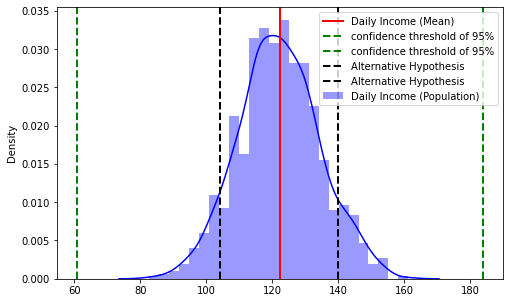

In [460]:
#Membuat plot untuk menentukan H0 dan H1
G_pop = np.random.normal(g.mean(), bp.std(), 1000)
#Menentukan nilai Confidence Interval
ci = stats.norm.interval(0.95, g.mean(), g.std())

plt.figure(figsize=(8,5))
sns.distplot(G_pop, label='Daily Income (Population)', color='blue')
plt.axvline(g.mean(), color='red', linewidth=2, label='Daily Income (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(G_pop.mean() + t_stat*G_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(G_pop.mean() - t_stat*G_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

---
Berdasarkan data grafik bahwa nilai alternatif hypothesis berada diantara garis ci maka H0 berhasil di terima yang menandakan bahwa rata-rata dari Glucose tidak sama dengan 120.

##Visualisasi

###Outcome pie chart

In [441]:
#Mengelompokan umur
Gol_umur = [20, 31, 41, 61, 81]
kategori = ['Remaja', 'Dewasa', "Orang_Tua", "Lansia"]
Golongan = pd.cut(db['Age'], bins = Gol_umur, labels = kategori)


Golongan:
* Remaja = 21-31 Tahun
* Dewasa = 32-41 Tahun
* Orang_Tua = 42-61 Tahun
* Lansia = 61-81 Tahun

In [442]:
#Membuat variabel label
db['Outcome'].sum()
label = db['Outcome'].unique()
label

array([0, 1])

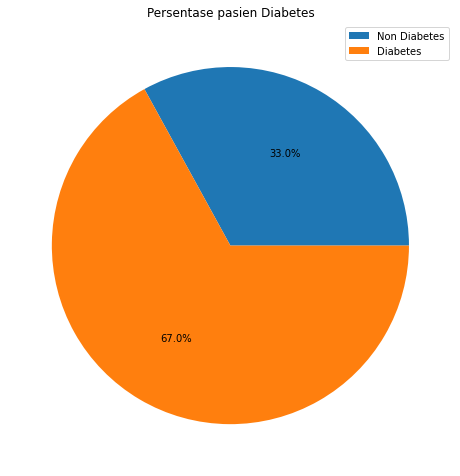

In [443]:
#Membuat pie chart outcome
Age_indo = db.sort_values(by=['Age'], ascending = False)
sum_out = db['Outcome'].sum()
Age_1 = db[db['Outcome']== 1]['Age'].count()
Age_0 = db[db['Outcome']== 0]['Age'].count()

plt.figure(figsize=(8,10))
plt.title('Persentase pasien Diabetes')
plt.legend(['1 Diabetes', 'Non Diabetes'])
aa = plt.pie([Age_1, Age_0], autopct = '%.1f%%')
plt.legend(['Non Diabetes', 'Diabetes'])

---
Diketahui dari diagram lingkar diatas bahwa jumlah pasien dengan diabetes lebih banyak dari yang tidak. Pasien dengan diabetes memiliki nilai 67% sedangkan untuk pasien yang tidak terkena diabetes sebesar 33%

## Histogram from Age

Text(0.5, 1.0, 'Nilai BMI berdasarkan Golongan Umur')

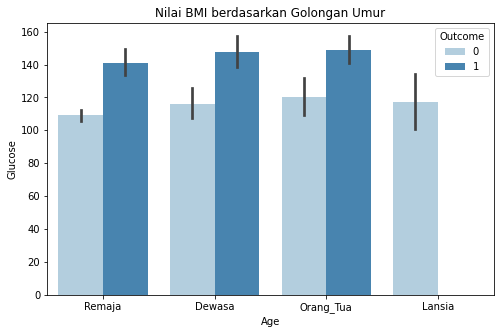

In [445]:
#Membuat histogram antara umur dan glucosa
plt.figure(figsize=(8,5))
Table_1 = sns.barplot(x = Golongan, y = "Glucose", hue = db['Outcome'], data = db, palette = "Blues")
plt.title('Nilai BMI berdasarkan Golongan Umur')


---
Dilihat dari grafik batang diatas bahwa orang tua dengan glucosa yang tinggi rentan terkena penyakit diabetes.

## Correlation 

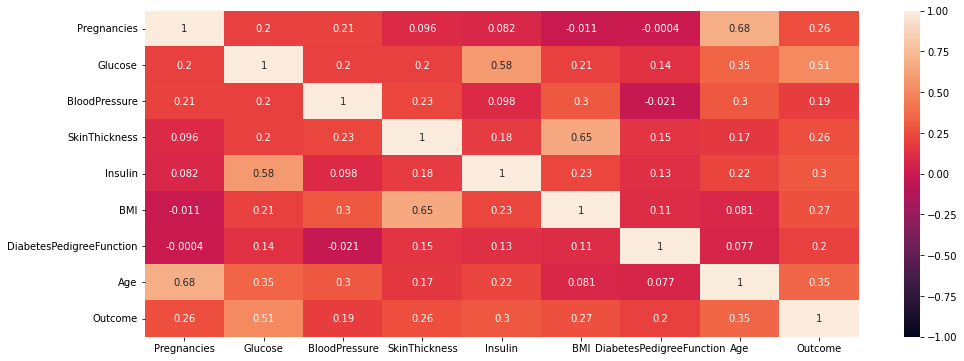

In [446]:
#Membuat tabel correlation
plt.figure(figsize=(16, 6))
sns.heatmap(db.corr(), vmin =-1, vmax=1, annot = True)

---
Dari tabel diatas yang memiliki korelasi paking tinggi adalah age dan pregnancies karena secara logika memang banyaknya kehamilan akan selaras dengan bertambahnya umur.
Jika dilihat dari nilai outcome atau pasien dengan diabetes atau tidak. Outcome paling berkorelasi dengan Glucose dan glucose memiliki korelasi yang tinggi juga dengan insulin.

## Glucose dan Insulin

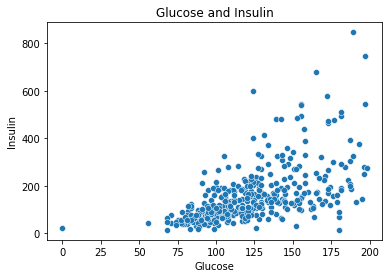

In [447]:
#Membuat scatter plot antara glucosa dan insulin
plt.title('Glucose and Insulin')
GI = sns.scatterplot(x = db['Glucose'], y = db['Insulin'])

---
Dilihat bahwa penyebaran nilai berpusat pada glucosa diatas 75 dan selaras dengan naiknya jumlah insulin.
Dapat dilihat pada range 75-125 terjadi penekanan kenaikan glucosa karena adanya insulin. Hal itu sesuai dengan teori bahwa insulin berguna untuk menekan glukosa di dalam tubuh

#Pengambilan Kesimpulan

Diabetes adalah suatu penyakit yang dapat diukur melalui diagnostik. Penyakit diabetes lebih rawan untuk orang tua dengan rentang umur 42-61 tahun dengan tingkat glucosa yang tinggi. Oleh karena itu glucose dalam tubuh kita dapat kita tekan peningkatannya dengan insulin.

#Penyimpanan Data

In [462]:
## DOWNLOADING CSV CLEAN FILES FOR TABLEAU 

from google.colab import files
db.to_csv(r'C:\Users\User\OneDrive\Desktop\HACKTIV8 DS\Mailstone\diabetes_clean.csv') 
files.download(r'C:\Users\User\OneDrive\Desktop\HACKTIV8 DS\Mailstone\diabetes_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>